In [1]:
#!pip install keras
#conda install -c conda-forge fbprophet
#conda install -c conda-forge tensorflow
import numpy as np
import pandas as pd 
import seaborn as sns
import random
import math
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import plotly.express as px
import datetime
from datetime import date, timedelta
from sklearn.cluster import KMeans
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import plotly.offline as py
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
import operator 
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


__1 STEP COLLECTING DATASETS__ 

In [2]:
deaths_df = pd.read_csv('D:\datasets\covid_19_jhu_data_web_scrap_and_cleaning-master\covid_19_jhu_data_web_scrap_and_cleaning-master/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('D:\datasets\covid_19_jhu_data_web_scrap_and_cleaning-master\covid_19_jhu_data_web_scrap_and_cleaning-master/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-04-2020.csv')
an_data = pd.read_csv("D:/datasets/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv")
data=pd.read_csv("D:\datasets\italy-covid19\covid19-ita-regions-latest.csv")
an_data = pd.read_csv("D:/datasets/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv")
comp = pd.read_excel('D:\datasets\italy-covid19\COVID-19-3.27-top30-500.xlsx')
province = pd.read_csv("D:/datasets/italy-covid19/covid19-ita-province-latest.csv")
confirmed_df = pd.read_csv('D:\datasets\covid_19_jhu_data_web_scrap_and_cleaning-master\covid_19_jhu_data_web_scrap_and_cleaning-master/time_series_covid19_confirmed_global.csv')

In [3]:
an_data.head()

ID age     sex                        city province country  \
0  1.0  30    male     Chaohu City, Hefei City    Anhui   China   
1  2.0  47    male  Baohe District, Hefei City    Anhui   China   
2  3.0  49    male  High-Tech Zone, Hefei City    Anhui   China   
3  4.0  47  female  High-Tech Zone, Hefei City    Anhui   China   
4  5.0  50  female  Feidong County, Hefei City    Anhui   China   

   wuhan(0)_not_wuhan(1)   latitude   longitude geo_resolution  ...  \
0                    1.0  31.646960  117.716600         admin3  ...   
1                    1.0  31.778630  117.331900         admin3  ...   
2                    1.0  31.828313  117.224844          point  ...   
3                    1.0  31.828313  117.224844          point  ...   
4                    1.0  32.001230  117.568100         admin3  ...   

  Unnamed: 35 Unnamed: 36 Unnamed: 37 Unnamed: 38 Unnamed: 39 Unnamed: 40  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

  Unnamed: 41 Unnamed: 42 Unnamed: 43  Unnamed: 44  
0         NaN         NaN         NaN          NaN  
1         NaN         NaN         NaN          NaN  
2         NaN         NaN         NaN          NaN  
3         NaN         NaN         NaN          NaN  
4         NaN         NaN         NaN          NaN  

[5 rows x 45 columns]

In [4]:
confirmed_df.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/7/20  4/8/20  4/9/20  4/10/20  4/11/20  \
0        0        0        0  ...     423     444     484      521      555   
1        0        0        0  ...     383     400     409      416      433   
2        0        0        0  ...    1468    1572    1666     1761     1825   
3        0        0        0  ...     545     564     583      601      601   
4        0        0        0  ...      17      19      19       19       19   

   4/12/20  4/13/20  4/14/20  4/15/20  4/16/20  
0      607      665      714      784      840  
1      446      467      475      494      518  
2     1914     1983     2070     2160     2268  
3      638      646      659      673      673  
4       19       19       19       19       19  

[5 rows x 90 columns]

In [5]:
deaths_df.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/7/20  4/8/20  4/9/20  4/10/20  4/11/20  \
0        0        0        0  ...      14      14      15       15       18   
1        0        0        0  ...      22      22      23       23       23   
2        0        0        0  ...     193     205     235      256      275   
3        0        0        0  ...      22      23      25       26       26   
4        0        0        0  ...       2       2       2        2        2   

   4/12/20  4/13/20  4/14/20  4/15/20  4/16/20  
0       18       21       23       25       30  
1       23       23       24       25       26  
2      293      313      326      336      348  
3       29       29       31       33       33  
4        2        2        2        2        2  

[5 rows x 90 columns]

In [6]:
recoveries_df.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/7/20  4/8/20  4/9/20  4/10/20  4/11/20  \
0        0        0        0  ...      18      29      32       32       32   
1        0        0        0  ...     131     154     165      182      197   
2        0        0        0  ...     113     237     347      405      460   
3        0        0        0  ...      39      52      58       71       71   
4        0        0        0  ...       2       2       2        2        4   

   4/12/20  4/13/20  4/14/20  4/15/20  4/16/20  
0       32       32       40       43       54  
1      217      232      248      251      277  
2      591      601      691      708      783  
3      128      128      128      169      169  
4        4        4        5        5        5  

[5 rows x 90 columns]

In [7]:
latest_data.head()

FIPS     Admin2  Province_State Country_Region   Last_Update        Lat  \
0  45001.0  Abbeville  South Carolina             US  4/4/20 23:34  34.223334   
1  22001.0     Acadia       Louisiana             US  4/4/20 23:34  30.295065   
2  51001.0   Accomack        Virginia             US  4/4/20 23:34  37.767072   
3  16001.0        Ada           Idaho             US  4/4/20 23:34  43.452658   
4  19001.0      Adair            Iowa             US  4/4/20 23:34  41.330756   

        Long_  Confirmed  Deaths  Recovered  Active  \
0  -82.461707          6       0          0       0   
1  -92.414197         65       2          0       0   
2  -75.632346          8       0          0       0   
3 -116.241552        360       3          0       0   
4  -94.471059          1       0          0       0   

                    Combined_Key  
0  Abbeville, South Carolina, US  
1          Acadia, Louisiana, US  
2         Accomack, Virginia, US  
3                 Ada, Idaho, US  
4                Adair, Iowa, US

In [8]:
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

In [9]:
confirmed_df.shape

(264, 90)

In [10]:
confirmed_df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
1/23/20             int64
1/24/20             int64
1/25/20             int64
1/26/20             int64
1/27/20             int64
1/28/20             int64
1/29/20             int64
1/30/20             int64
1/31/20             int64
2/1/20              int64
2/2/20              int64
2/3/20              int64
2/4/20              int64
2/5/20              int64
2/6/20              int64
2/7/20              int64
2/8/20              int64
2/9/20              int64
2/10/20             int64
2/11/20             int64
2/12/20             int64
2/13/20             int64
2/14/20             int64
2/15/20             int64
2/16/20             int64
                   ...   
3/18/20             int64
3/19/20             int64
3/20/20             int64
3/21/20             int64
3/22/20             int64
3/23/20             int64
3/24/20             int64
3/25/20     

In [11]:
confirmed_df.describe(include='all')

Province/State Country/Region         Lat        Long     1/22/20  \
count              82            264  264.000000  264.000000  264.000000   
unique             82            185         NaN         NaN         NaN   
top             Anhui          China         NaN         NaN         NaN   
freq                1             33         NaN         NaN         NaN   
mean              NaN            NaN   21.317326   22.168315    2.102273   
std               NaN            NaN   24.734994   70.669996   27.382118   
min               NaN            NaN  -51.796300 -135.000000    0.000000   
25%               NaN            NaN    6.969250  -20.026050    0.000000   
50%               NaN            NaN   23.488100   20.535638    0.000000   
75%               NaN            NaN   41.166075   78.750000    0.000000   
max               NaN            NaN   71.706900  178.065000  444.000000   

           1/23/20     1/24/20     1/25/20      1/26/20      1/27/20  ...  \
count   264.000000  264.000000  264.000000   264.000000   264.000000  ...   
unique         NaN         NaN         NaN          NaN          NaN  ...   
top            NaN         NaN         NaN          NaN          NaN  ...   
freq           NaN         NaN         NaN          NaN          NaN  ...   
mean      2.477273    3.564394    5.431818     8.022727    11.087121  ...   
std      27.480921   34.210982   47.612615    66.537101    89.647535  ...   
min       0.000000    0.000000    0.000000     0.000000     0.000000  ...   
25%       0.000000    0.000000    0.000000     0.000000     0.000000  ...   
50%       0.000000    0.000000    0.000000     0.000000     0.000000  ...   
75%       0.000000    0.000000    0.000000     0.000000     0.000000  ...   
max     444.000000  549.000000  761.000000  1058.000000  1423.000000  ...   

               4/7/20         4/8/20         4/9/20        4/10/20  \
count      264.000000     264.000000     264.000000     264.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean      5284.825758    5606.825758    5923.996212    6278.507576   
std      29008.944879   31063.024067   33074.346137   35261.959793   
min          0.000000       0.000000       0.000000       0.000000   
25%         25.750000      27.750000      29.500000      32.000000   
50%        232.500000     246.000000     254.500000     256.500000   
75%       1128.750000    1189.250000    1233.750000    1269.250000   
max     396223.000000  429052.000000  461437.000000  496535.000000   

              4/11/20        4/12/20        4/13/20        4/14/20  \
count      264.000000     264.000000     264.000000     264.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean      6574.431818    6949.700758    7215.295455    7485.571970   
std      37137.014066   39181.457686   40763.518495   42450.795915   
min          0.000000      -1.000000      -1.000000      -1.000000   
25%         33.750000      33.750000      39.500000      40.750000   
50%        265.500000     276.000000     294.500000     304.000000   
75%       1305.500000    1314.250000    1352.000000    1379.750000   
max     526396.000000  555313.000000  580619.000000  607670.000000   

              4/15/20        4/16/20  
count      264.000000     264.000000  
unique            NaN            NaN  
top               NaN            NaN  
freq              NaN            NaN  
mean      7788.083333    8153.962121  
std      44263.148610   46373.799045  
min         -1.000000      -1.000000  
25%         48.000000      48.750000  
50%        319.000000     331.500000  
75%       1407.500000    1533.250000  
max     636350.000000  667801.000000  

[11 rows x 90 colu

__2 STEP DATA ANALYSIS__

In [12]:
cols = confirmed_df.keys()

In [13]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [14]:
dates = confirmed_df.columns[4:]

conf_df_long = confirmed_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Confirmed')

deaths_df_long = deaths_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Deaths')

recv_df_long = recoveries_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Recovered')

full_table = pd.concat([conf_df_long, deaths_df_long['Deaths'], recv_df_long['Recovered']], 
                       axis=1, sort=False)

full_table.head()

Province/State Country/Region      Lat     Long     Date  Confirmed  Deaths  \
0            NaN    Afghanistan  33.0000  65.0000  1/22/20          0       0   
1            NaN        Albania  41.1533  20.1683  1/22/20          0       0   
2            NaN        Algeria  28.0339   1.6596  1/22/20          0       0   
3            NaN        Andorra  42.5063   1.5218  1/22/20          0       0   
4            NaN         Angola -11.2027  17.8739  1/22/20          0       0   

   Recovered  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0

In [15]:
# removing county wise data to avoid double counting

full_table = full_table[full_table['Province/State'].str.contains(',')!=True]

In [16]:
full_table['Country/Region'] = full_table['Country/Region'].replace('Korea, South', 'South Korea')

In [17]:
full_table.to_csv('covid_19_clean_completes.csv', index=False)

In [18]:
full_table

Province/State          Country/Region        Lat  \
0                               NaN             Afghanistan  33.000000   
1                               NaN                 Albania  41.153300   
2                               NaN                 Algeria  28.033900   
3                               NaN                 Andorra  42.506300   
4                               NaN                  Angola -11.202700   
5                               NaN     Antigua and Barbuda  17.060800   
6                               NaN               Argentina -38.416100   
7                               NaN                 Armenia  40.069100   
8      Australian Capital Territory               Australia -35.473500   
9                   New South Wales               Australia -33.868800   
10               Northern Territory               Australia -12.463400   
11                       Queensland               Australia -28.016700   
12                  South Australia               Australia -34.928500   
13                         Tasmania               Australia -41.454500   
14                         Victoria               Australia -37.813600   
15                Western Australia               Australia -31.950500   
16                              NaN                 Austria  47.516200   
17                              NaN              Azerbaijan  40.143100   
18                              NaN                 Bahamas  25.034300   
19                              NaN                 Bahrain  26.027500   
20                              NaN              Bangladesh  23.685000   
21                              NaN                Barbados  13.193900   
22                              NaN                 Belarus  53.709800   
23                              NaN                 Belgium  50.833300   
24                              NaN                   Benin   9.307700   
25                              NaN                  Bhutan  27.514200   
26                              NaN                 Bolivia -16.290200   
27                              NaN  Bosnia and Herzegovina  43.915900   
28                              NaN                  Brazil -14.235000   
29                              NaN                  Brunei   4.535300   
...                             ...                     ...        ...   
22673                           NaN                 Grenada  12.116500   
22674                           NaN              Mozambique -18.665695   
22675                           NaN                   Syria  34.802075   
22676                           NaN             Timor-Leste  -8.874217   
22677                           NaN                  Belize  13.193900   
22678                     Recovered                  Canada   0.000000   
22679                           NaN                    Laos  19.856270   
22680                           NaN                   Libya  26.335100   
22681                           NaN      West Bank and Gaza  31.952200   
22682                           NaN           Guinea-Bissau  11.803700   
22683                           NaN                    Mali  17.570692   
22684                           NaN   Saint Kitts and Nevis  17.357822   
22685         Northwest Territories                  Canada  64.825500   
22686                         Yukon                  Canada  64.282300   
22687                           NaN                  Kosovo  42.602636   
22688                           NaN                   Burma  21.916200   
22689                      Anguilla          United Kingdom  18.220600   
22690        British Virgin Islands          United Kingdom  18.420700   
22691      Turks and Caicos Islands          United Kingdom  21.694000   
22692                           NaN              MS Zaandam   0.000000   
22693                           NaN                Botswana -22.328500   
22694                           NaN                 Burundi  -3.373100   
22695                    

In [19]:
full_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22618 entries, 0 to 22703
Data columns (total 8 columns):
Province/State    6966 non-null object
Country/Region    22618 non-null object
Lat               22618 non-null float64
Long              22618 non-null float64
Date              22618 non-null object
Confirmed         22618 non-null int64
Deaths            22618 non-null int64
Recovered         21419 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 1.6+ MB


In [20]:
# checking for missing value
full_table.isna().sum()

Province/State    15652
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered          1199
dtype: int64

In [21]:
sars_03 = pd.read_csv("D:\datasets\sars_2003_complete_dataset_clean.csv", 
                       parse_dates=['Date'])

In [22]:
sars_03 = sars_03[['Date', 'Country', 'Cumulative number of case(s)', 
                   'Number of deaths', 'Number recovered']]

# renaming columns
sars_03.columns = ['Date', 'Country', 'Cases', 'Deaths', 'Recovered']

# group by date and country
sars_03 = sars_03.groupby(['Date', 'Country'])['Cases', 'Deaths', 'Recovered']
sars_03 = sars_03.sum().reset_index()

# latest
s_lat = sars_03[sars_03['Date'] == max(sars_03['Date'])].reset_index()

# latest grouped by country
s_lat_grp = s_lat.groupby('Country')['Cases', 'Deaths', 'Recovered'].sum().reset_index()

# nth day
sars_03['nth_day'] = (sars_03['Date'] - min(sars_03['Date'])).dt.days

# day by day
s_dbd = sars_03.groupby('Date')['Cases', 'Deaths', 'Recovered'].sum().reset_index()

# nth day
s_dbd['nth_day'] = sars_03.groupby('Date')['nth_day'].max().values

# no. of countries
temp = sars_03[sars_03['Cases']>0]
s_dbd['n_countries'] = temp.groupby('Date')['Country'].apply(len).values


s_dbd['new_cases'] = s_dbd['Cases'].diff()
s_dbd['new_deaths'] = s_dbd['Deaths'].diff()
s_dbd['epidemic'] = 'SARS'

s_dbd.head()

Date  Cases  Deaths  Recovered  nth_day  n_countries  new_cases  \
0 2003-03-17    167       4          0        0            7        NaN   
1 2003-03-18    219       4          0        1            9       52.0   
2 2003-03-19    264       9          0        2           11       45.0   
3 2003-03-20    306      10          0        3           12       42.0   
4 2003-03-21    350      10          0        4           14       44.0   

   new_deaths epidemic  
0         NaN     SARS  
1         0.0     SARS  
2         5.0     SARS  
3         1.0     SARS  
4         0.0     SARS

In [23]:
# MERS
mers_cntry = pd.read_csv("D:\datasets\country_count_latest.csv")
mers_weekly = pd.read_csv("D:\datasets\weekly_clean.csv")

In [24]:
mers_weekly

Year  Week             Region  New Cases
0     2012    12    Other Countries          1
1     2012    12  Republic of Korea          0
2     2012    12       Saudi Arabia          0
3     2012    13    Other Countries          0
4     2012    13  Republic of Korea          0
5     2012    13       Saudi Arabia          0
6     2012    14    Other Countries          1
7     2012    14  Republic of Korea          0
8     2012    14       Saudi Arabia          0
9     2012    15    Other Countries          0
10    2012    15  Republic of Korea          0
11    2012    15       Saudi Arabia          0
12    2012    16    Other Countries          0
13    2012    16  Republic of Korea          0
14    2012    16       Saudi Arabia          0
15    2012    17    Other Countries          0
16    2012    17  Republic of Korea          0
17    2012    17       Saudi Arabia          0
18    2012    18    Other Countries          0
19    2012    18  Republic of Korea          0
20    2012    18       Saudi Arabia          0
21    2012    19    Other Countries          0
22    2012    19  Republic of Korea          0
23    2012    19       Saudi Arabia          0
24    2012    20    Other Countries          0
25    2012    20  Republic of Korea          0
26    2012    20       Saudi Arabia          0
27    2012    21    Other Countries          0
28    2012    21  Republic of Korea          0
29    2012    21       Saudi Arabia          0
...    ...   ...                ...        ...
1098  2019    15    Other Countries          0
1099  2019    15  Republic of Korea          0
1100  2019    15       Saudi Arabia          5
1101  2019    16    Other Countries          0
1102  2019    16  Republic of Korea          0
1103  2019    16       Saudi Arabia          1
1104  2019    17    Other Countries          0
1105  2019    17  Republic of Korea          0
1106  2019    17       Saudi Arabia          1
1107  2019    18    Other Countries          0
1108  2019    18  Republic of Korea          0
1109  2019    18       Saudi Arabia          2
1110  2019    19    Other Countries          0
1111  2019    19  Republic of Korea          0
1112  2019    19       Saudi Arabia          3
1113  2019    20    Other Countries          0
1114  2019    20  Republic of Korea          0
1115  2019    20       Saudi Arabia          5
1116  2019    21    Other Countries          0
1117  2019    21  Republic of Korea          0
1118  2019    21       Saudi Arabia          3
1119  2019    22    Other Countries          0
1120  2019    22  Republic of Korea          0
1121  2019    22       Saudi Arabia          2
1122  2019    23    Other Countries          0
1123  2019    23  Republic of Korea          0
1124  2019    23       Saudi Arabia          1
1125  2019    24    Other Countries          0
1126  2019    24  Republic of Korea          0
1127  2019    24       Saudi Arabia          2

[1128 rows x 4 columns]

In [25]:
# cleaning
mers_weekly['Year-Week'] = mers_weekly['Year'].astype(str) + ' - ' + mers_weekly['Week'].astype(str)


In [26]:
covid_19 = pd.read_csv('D:\datasets\covid_19_jhu_data_web_scrap_and_cleaning-master\covid_19_jhu_data_web_scrap_and_cleaning-master\covid_19_clean_complete.csv', 
                       parse_dates=['Date'])

# selecting important columns only
covid_19 = covid_19[['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']]

# replacing Mainland china with just China
covid_19['Country/Region'] = covid_19['Country/Region'].replace('Mainland China', 'China')

# renaming columns
covid_19.columns = ['Date', 'Country', 'Cases', 'Deaths', 'Recovered']

# group by date and country
covid_19 = covid_19.groupby(['Date', 'Country'])['Cases', 'Deaths', 'Recovered']
covid_19 = covid_19.sum().reset_index()

# latest
c_lat = covid_19[covid_19['Date'] == max(covid_19['Date'])].reset_index()

# latest grouped by country
c_lat_grp = c_lat.groupby('Country')['Cases', 'Deaths', 'Recovered'].sum().reset_index()

# nth day
covid_19['nth_day'] = (covid_19['Date'] - min(covid_19['Date'])).dt.days

# day by day
c_dbd = covid_19.groupby('Date')['Cases', 'Deaths', 'Recovered'].sum().reset_index()

# nth day
c_dbd['nth_day'] = covid_19.groupby('Date')['nth_day'].max().values

# no. of countries
temp = covid_19[covid_19['Cases']>0]
c_dbd['n_countries'] = temp.groupby('Date')['Country'].apply(len).values

c_dbd['new_cases'] = c_dbd['Cases'].diff()
c_dbd['new_deaths'] = c_dbd['Deaths'].diff()
c_dbd['epidemic'] = 'COVID-19'

covid_19.head()

Date      Country  Cases  Deaths  Recovered  nth_day
0 2020-01-22  Afghanistan      0       0          0        0
1 2020-01-22      Albania      0       0          0        0
2 2020-01-22      Algeria      0       0          0        0
3 2020-01-22      Andorra      0       0          0        0
4 2020-01-22       Angola      0       0          0        0

In [27]:
# EBOLA
# ------

# ebola dataset
ebola_14 = pd.read_csv("D:\datasets\ebola_2014_2016_clean.csv", 
                       parse_dates=['Date'])

# ebola_14 = ebola_14[ebola_14['Date']!=max(ebola_14['Date'])]

# selecting important columns only
ebola_14 = ebola_14[['Date', 'Country', 'No. of confirmed, probable and suspected cases',
                     'No. of confirmed, probable and suspected deaths']]

# renaming columns
ebola_14.columns = ['Date', 'Country', 'Cases', 'Deaths']
ebola_14.head()

# group by date and country
ebola_14 = ebola_14.groupby(['Date', 'Country'])['Cases', 'Deaths']
ebola_14 = ebola_14.sum().reset_index()

# filling missing values
ebola_14['Cases'] = ebola_14['Cases'].fillna(0)
ebola_14['Deaths'] = ebola_14['Deaths'].fillna(0)

# converting datatypes
ebola_14['Cases'] = ebola_14['Cases'].astype('int')
ebola_14['Deaths'] = ebola_14['Deaths'].astype('int')

# latest
e_lat = ebola_14[ebola_14['Date'] == max(ebola_14['Date'])].reset_index()

# latest grouped by country
e_lat_grp = e_lat.groupby('Country')['Cases', 'Deaths'].sum().reset_index()

# nth day
ebola_14['nth_day'] = (ebola_14['Date'] - min(ebola_14['Date'])).dt.days

# day by day
e_dbd = ebola_14.groupby('Date')['Cases', 'Deaths'].sum().reset_index()

# nth day
e_dbd['nth_day'] = ebola_14.groupby('Date')['nth_day'].max().values

# no. of countries
temp = ebola_14[ebola_14['Cases']>0]
e_dbd['n_countries'] = temp.groupby('Date')['Country'].apply(len).values

e_dbd['new_cases'] = e_dbd['Cases'].diff()
e_dbd['new_deaths'] = e_dbd['Deaths'].diff()
e_dbd['epidemic'] = 'EBOLA'

ebola_14.head()

Date       Country  Cases  Deaths  nth_day
0 2014-08-29        Guinea    648     430        0
1 2014-08-29       Liberia   1378     694        0
2 2014-08-29       Nigeria     19       7        0
3 2014-08-29  Sierra Leone   1026     422        0
4 2014-09-05        Guinea    812     517        7

In [28]:
full_latest = full_table[full_table['Date'] == max(full_table['Date'])].reset_index()

In [29]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
china_cases = [] 
italy_cases = []
us_cases = [] 
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    

    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
 
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

 
    china_cases.append(confirmed_df[confirmed_df['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_df[confirmed_df['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_df[confirmed_df['Country/Region']=='US'][i].sum())
   

In [30]:
an_data = an_data[an_data['country']=='Italy']
an_data.shape

(588, 45)

[(0.0, 133.1891721424099)]

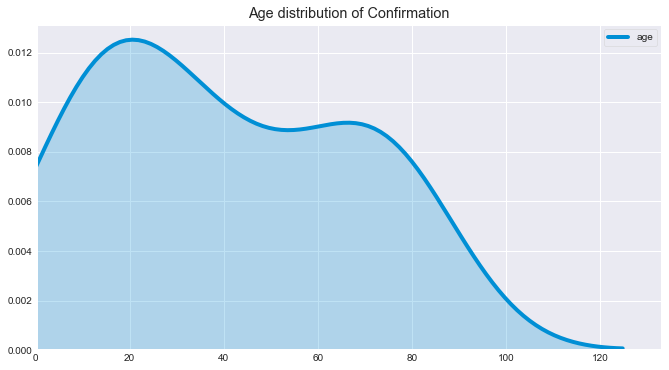

In [31]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of Confirmation")
sns.kdeplot(data=an_data['age'], shade=True).set(xlim=(0))

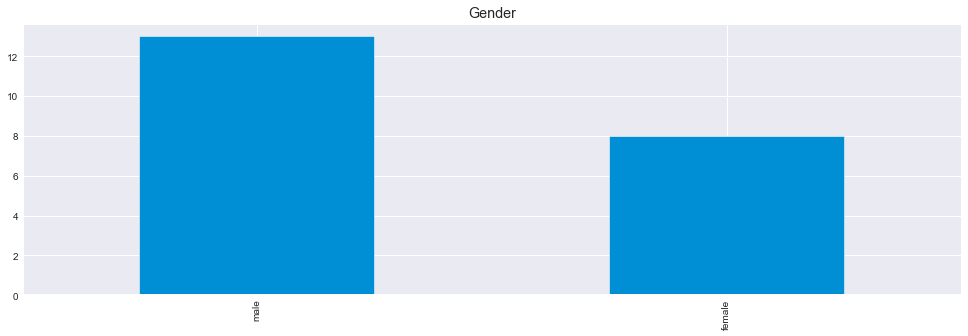

In [32]:
plt.figure(figsize=(15, 5))
plt.title('Gender')
an_data.sex.value_counts().plot.bar();

In [33]:
fig = px.pie( values=an_data.groupby(['sex']).size().values,names=an_data.groupby(['sex']).size().index)
fig.update_layout(
    font=dict(
        size=15,
        color="#242323"
    )
    )   
    
py.iplot(fig)

In [34]:
male_dead = an_data[an_data.sex=='male']
female_dead = an_data[an_data.sex=='female']

[(0.0, 163.9277045948024)]

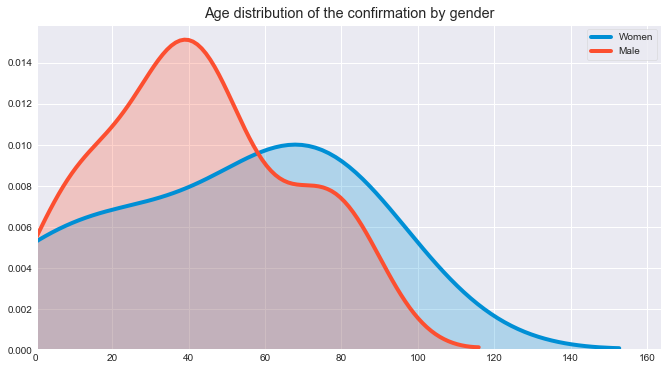

In [35]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of the confirmation by gender")
sns.kdeplot(data=female_dead['age'], label="Women", shade=True).set(xlim=(0))
sns.kdeplot(data=male_dead['age'],label="Male" ,shade=True).set(xlim=(0))

In [36]:
fig = px.choropleth(c_lat_grp, locations="Country", locationmode='country names',
                    color="Cases", hover_name="Country", 
                    color_continuous_scale="Sunsetdark", title='COVID-19')
fig.update(layout_coloraxis_showscale=False)
fig.show()

fig = px.choropleth(e_lat_grp, locations="Country", locationmode='country names',
                    color="Cases", hover_name="Country", 
                    color_continuous_scale="Sunsetdark", title='EBOLA 2014')
fig.update(layout_coloraxis_showscale=False)
fig.show()

#-----------------------------------------------------------------------------------------

fig = px.choropleth(s_lat_grp, locations="Country", locationmode='country names',
                    color="Cases", hover_name="Country", 
                    color_continuous_scale="Sunsetdark", title='SARS 2003')
fig.update(layout_coloraxis_showscale=False)
fig.show()

#-----------------------------------------------------------------------------------------

fig = px.choropleth(mers_cntry, locations="Country", locationmode='country names',
                    color="Confirmed", hover_name="Country", 
                    color_continuous_scale='Sunsetdark', title='MERS')
fig.update(layout_coloraxis_showscale=False)
fig.show()


In [37]:
fig = px.choropleth(c_lat_grp[c_lat_grp['Deaths']>0], locations="Country", locationmode='country names',
                    color="Deaths", hover_name="Country", 
                    color_continuous_scale="Sunsetdark", title='COVID-19')
fig.update(layout_coloraxis_showscale=False)
fig.show()

#-----------------------------------------------------------------------------------------

fig = px.choropleth(e_lat_grp[e_lat_grp['Deaths']>0], locations="Country", locationmode='country names',
                    color="Deaths", hover_name="Country", 
                    color_continuous_scale="Sunsetdark", title='EBOLA 2014')
fig.update(layout_coloraxis_showscale=False)
fig.show()

#-----------------------------------------------------------------------------------------

fig = px.choropleth(s_lat_grp[s_lat_grp['Deaths']>0], locations="Country", locationmode='country names',
                    color="Deaths", hover_name="Country", 
                    color_continuous_scale="Sunsetdark", title='SARS 2003')
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [38]:
fig = px.treemap(c_lat_grp.sort_values(by='Cases', ascending=False).reset_index(drop=True), 
                 path=["Country"], values="Cases", title='COVID-19',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()

fig = px.treemap(e_lat_grp.sort_values(by='Cases', ascending=False).reset_index(drop=True), 
                 path=["Country"], values="Cases", title='EBOLA',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()

fig = px.treemap(s_lat_grp.sort_values(by='Cases', ascending=False).reset_index(drop=True), 
                 path=["Country"], values="Cases", title='SARS',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()

fig = px.treemap(mers_cntry, 
                 path=["Country"], values="Confirmed", title='MERS',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()

In [39]:
c_cases = sum(c_lat_grp['Cases'])
c_deaths = sum(c_lat_grp['Deaths'])
c_no_countries = len(c_lat_grp['Country'].value_counts())

s_cases = sum(s_lat_grp['Cases'])
s_deaths = sum(s_lat_grp['Deaths'])
s_no_countries = len(s_lat_grp['Country'].value_counts())

e_cases = sum(e_lat_grp['Cases'])
e_deaths = sum(e_lat_grp['Deaths'])
e_no_countries = len(e_lat_grp['Country'].value_counts())

In [40]:
pandemia = pd.DataFrame({
    'pandemia' : ['COVID-19', 'SARS', 'EBOLA', 'MERS'],
    'start_year' : [2019, 2003, 2014, 2012 ],
    'end_year' : [2020, 2004, 2016, 2017],
    'confirmed' : [c_cases, s_cases, e_cases, 2494],
    'deaths' : [c_deaths, s_deaths, e_deaths, 858],
    'no_of_countries' : [c_no_countries, s_no_countries, e_no_countries, 27]
})

pandemia['mortality'] = round((pandemia['deaths']/pandemia['confirmed'])*100, 2)
pandemia = pandemia.sort_values('end_year').reset_index(drop=True)
pandemia.head()

pandemia  start_year  end_year  confirmed  deaths  no_of_countries  \
0      SARS        2003      2004       8432     813               31   
1     EBOLA        2014      2016      28642   11319               10   
2      MERS        2012      2017       2494     858               27   
3  COVID-19        2019      2020    2152643  143800              185   

   mortality  
0       9.64  
1      39.52  
2      34.40  
3       6.68

In [41]:
s = '#442288'
h = '#6CA2EA'
e = '#B5D33D'
m = '#FED23F'
c = '#EB7D5B'
shemc = [s, h, e, m, c]
sec = [s, e, c]

In [42]:
fig = px.bar(pandemia.sort_values('confirmed',ascending=False), 
             x="confirmed", y="pandemia", color='pandemia', 
             text='confirmed', orientation='h', title='No. of Cases',
             color_discrete_sequence = [c, e, s, m])
fig.update_traces(textposition='auto')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

fig = px.bar(pandemia.sort_values('deaths',ascending=False), 
             x="deaths", y="pandemia", color='pandemia', 
             text='deaths', orientation='h', title='No. of Deaths',
             color_discrete_sequence = [ e, c, m, s])
fig.update_traces(textposition='auto')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

fig = px.bar(pandemia.sort_values('mortality',ascending=False),
             x="mortality", y="pandemia", color='pandemia', 
             text='mortality', orientation='h', title='Moratlity rate', 
             range_x=[0,100],
             color_discrete_sequence = [ m, s, c, h])
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

fig = px.bar(pandemia.sort_values('no_of_countries', ascending=False),
             x="no_of_countries", y="pandemia", color='pandemia', 
             text='no_of_countries', orientation='h', title='No. of Countries', 
             range_x=[0,200],
             color_discrete_sequence = [ c, s, m, e])
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [44]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)


In [45]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [46]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [47]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [48]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.10, shuffle=False)

In [49]:
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=7, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

MAE: 633160.0617568655
MSE: 501747514585.62054


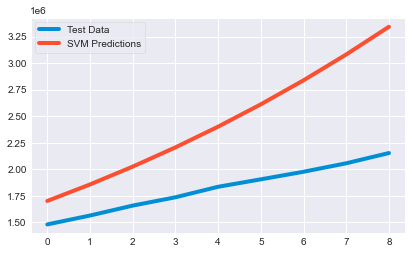

In [50]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [51]:
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

In [52]:
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 231761.79649453444
MSE: 69326159721.3757


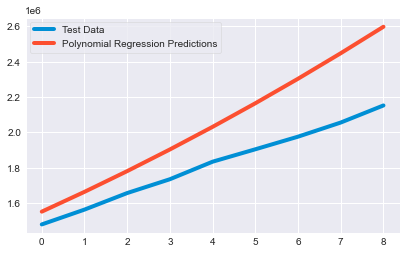

In [53]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

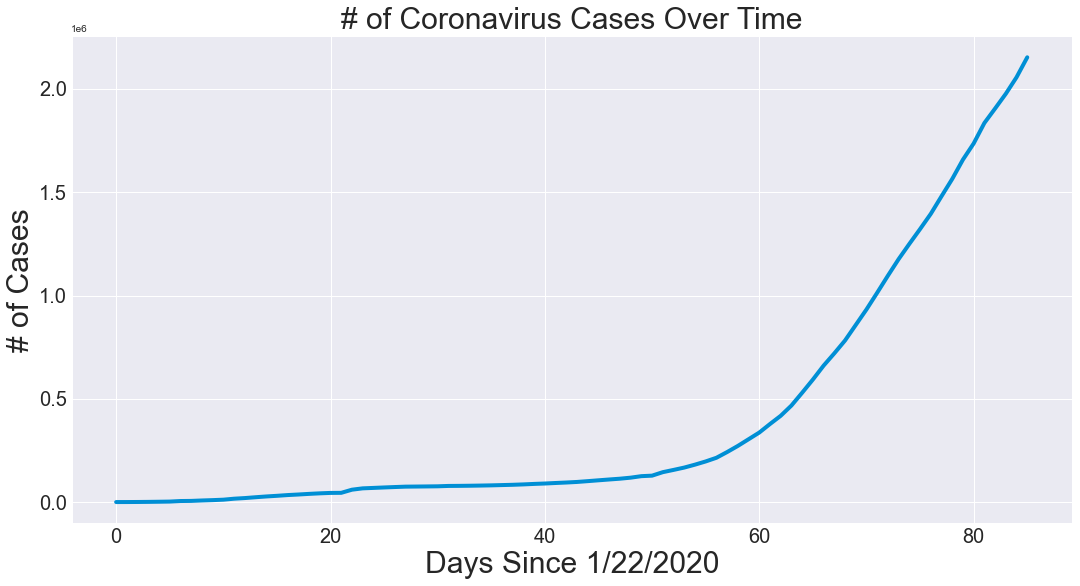

In [54]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

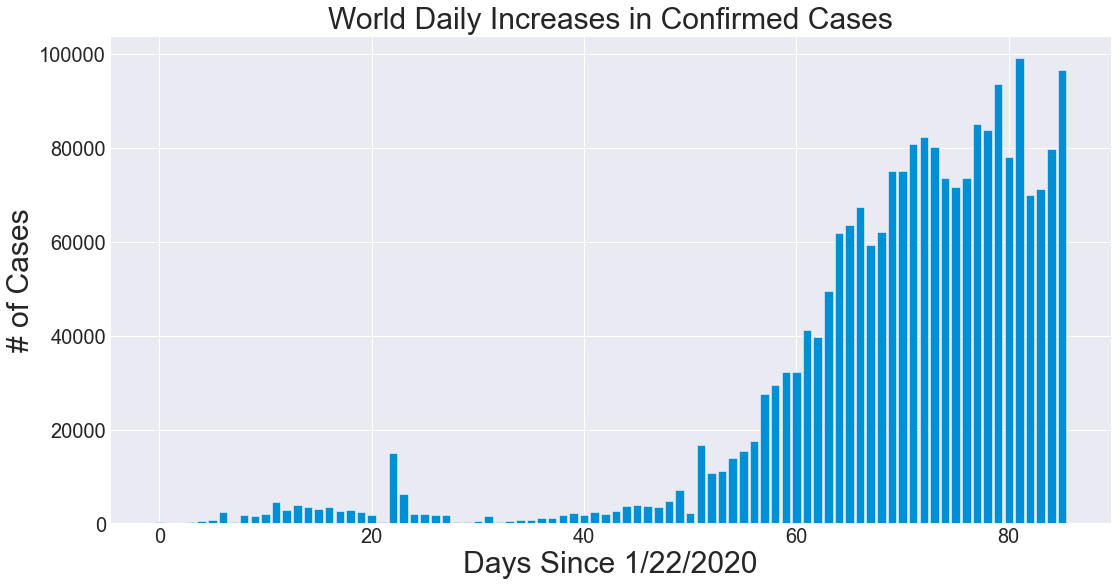

In [55]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_increase)
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

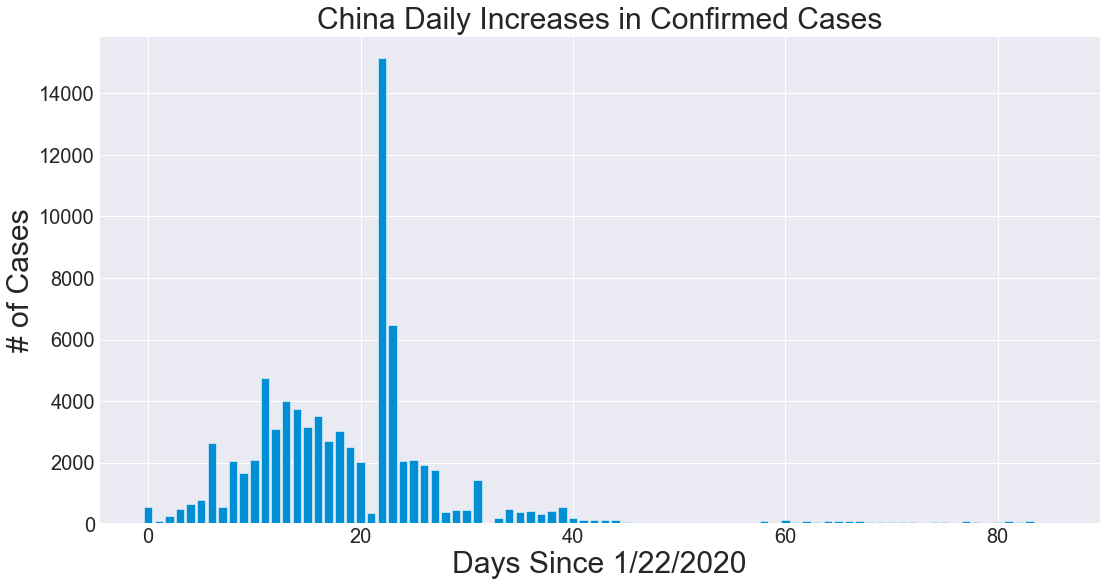

In [56]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, china_daily_increase)
plt.title('China Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

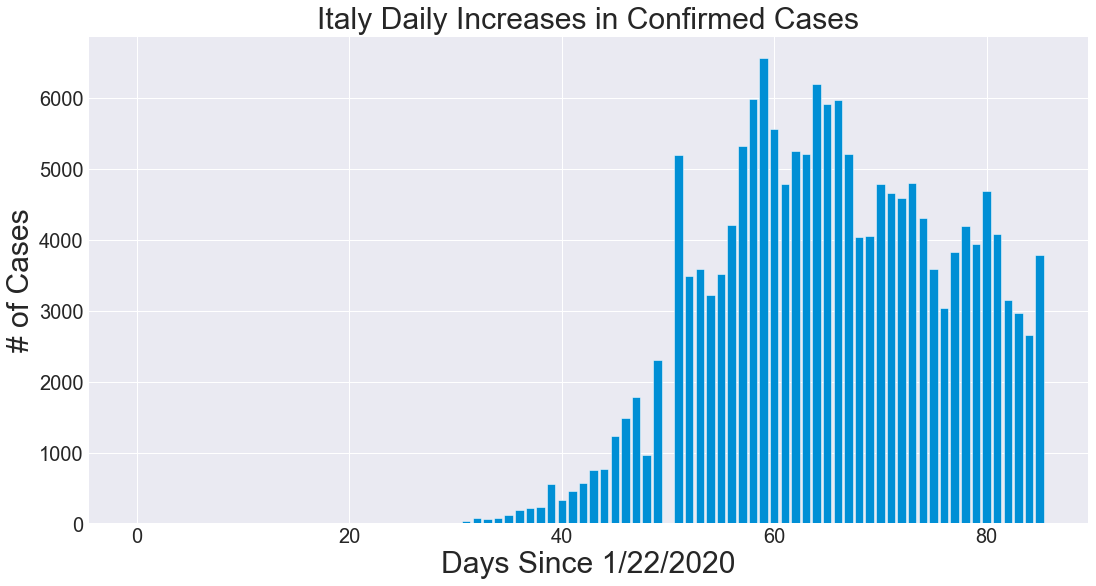

In [57]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, italy_daily_increase)
plt.title('Italy Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

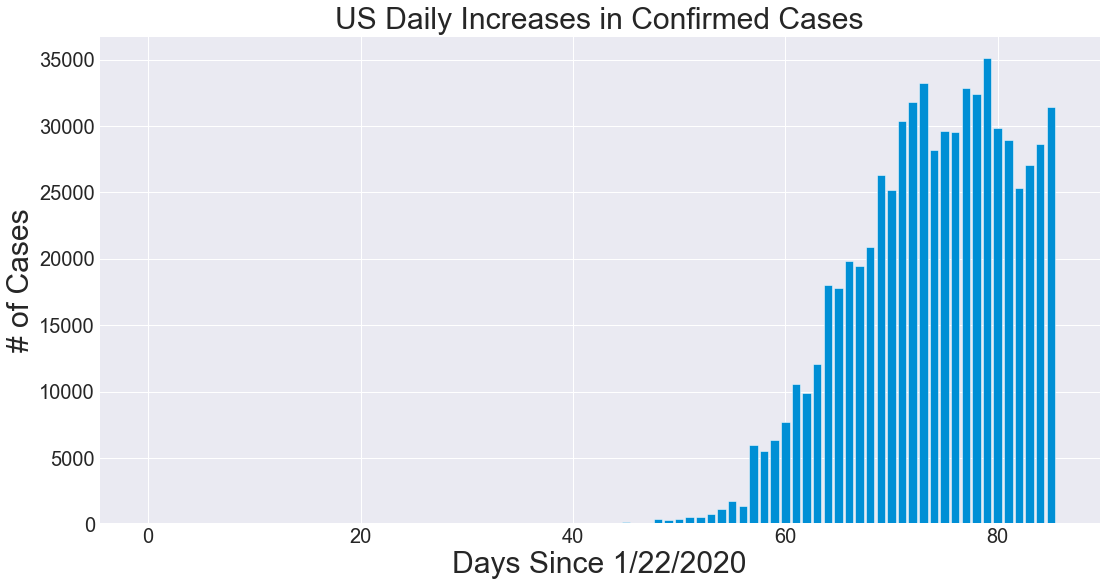

In [58]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, us_daily_increase)
plt.title('US Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

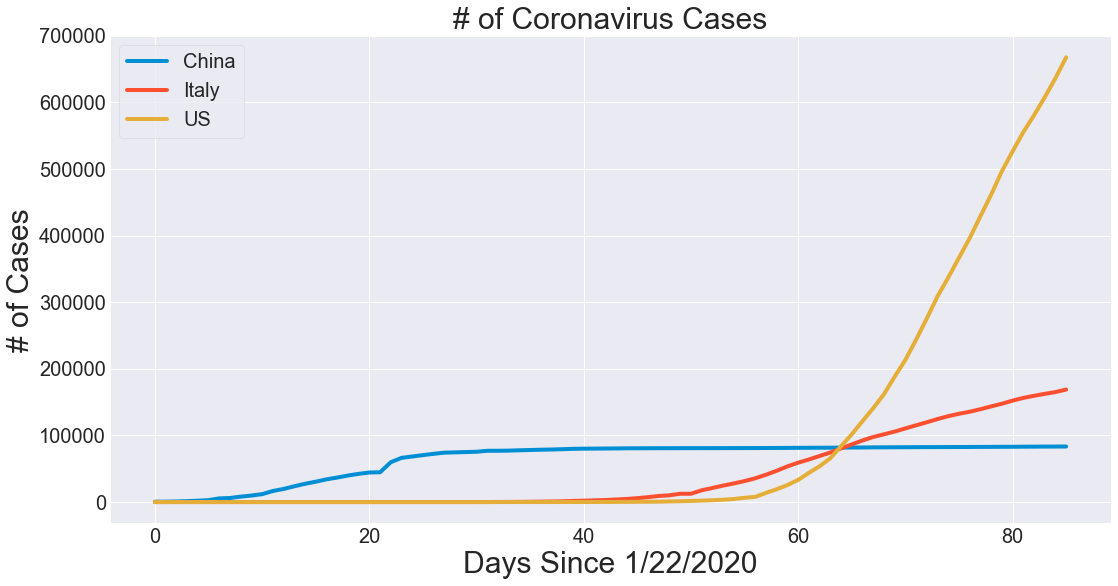

In [59]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_cases)
plt.plot(adjusted_dates, italy_cases)
plt.plot(adjusted_dates, us_cases)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['China', 'Italy', 'US'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

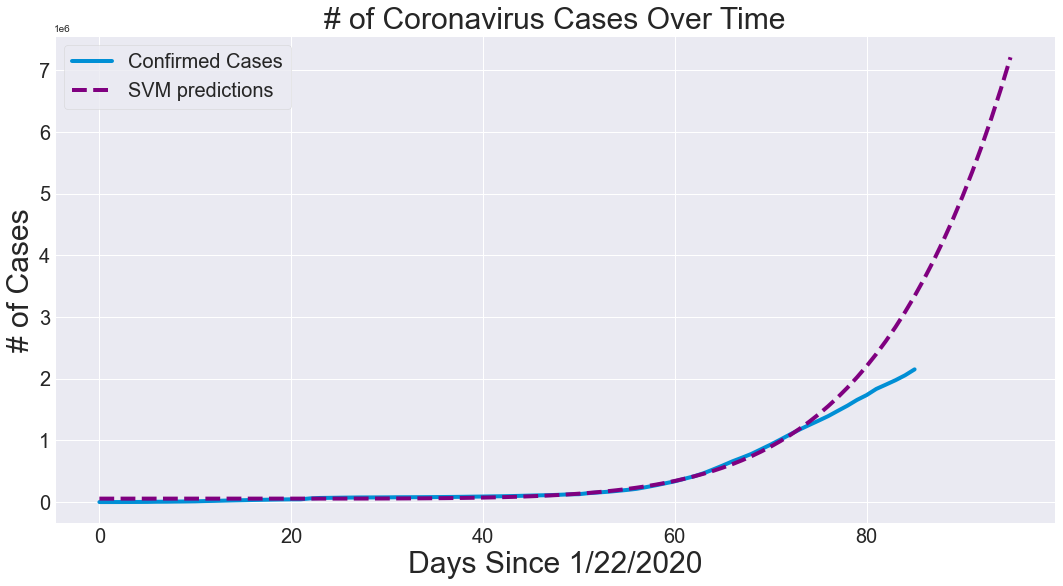

In [60]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, svm_pred, linestyle='dashed', color='purple')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

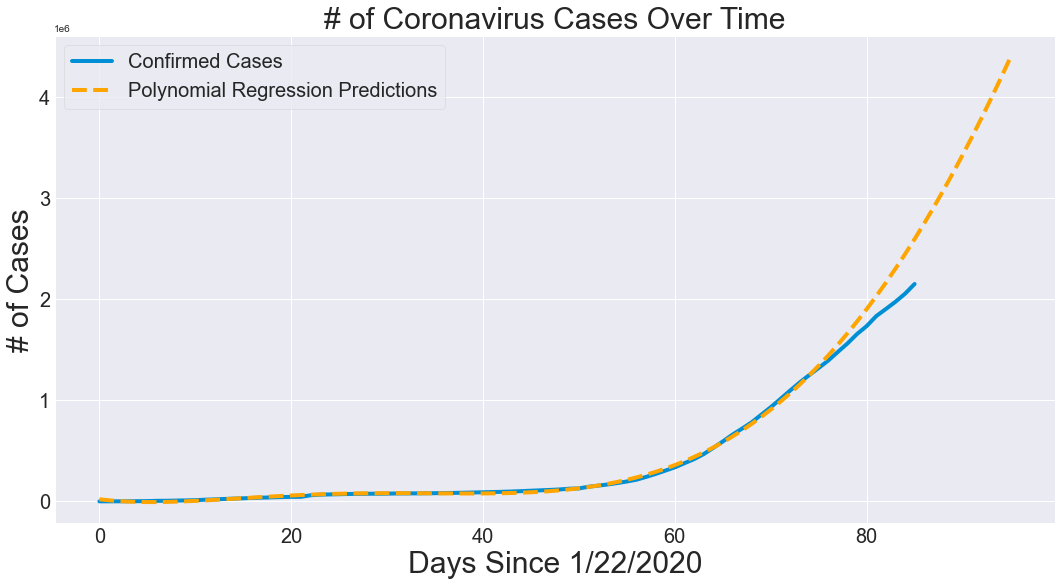

In [61]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, linear_pred, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Polynomial Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [62]:

# Future predictions using SVM 
print('SVM future predictions:')
set(zip(future_forcast_dates[-10:], np.round(svm_pred[-10:])))

SVM future predictions:


{('04/17/2020', 3622217.0),
 ('04/18/2020', 3922788.0),
 ('04/19/2020', 4244818.0),
 ('04/20/2020', 4589569.0),
 ('04/21/2020', 4958363.0),
 ('04/22/2020', 5352580.0),
 ('04/23/2020', 5773664.0),
 ('04/24/2020', 6223124.0),
 ('04/25/2020', 6702536.0),
 ('04/26/2020', 7213545.0)}

In [63]:
linear_pred = linear_pred.reshape(1,-1)[0]
print('Polynomial regression future predictions:')
set(zip(future_forcast_dates[-10:], np.round(linear_pred[-10:])))

Polynomial regression future predictions:


{('04/17/2020', 2752661.0),
 ('04/18/2020', 2913417.0),
 ('04/19/2020', 3079719.0),
 ('04/20/2020', 3251560.0),
 ('04/21/2020', 3428921.0),
 ('04/22/2020', 3611775.0),
 ('04/23/2020', 3800085.0),
 ('04/24/2020', 3993801.0),
 ('04/25/2020', 4192865.0),
 ('04/26/2020', 4397207.0)}

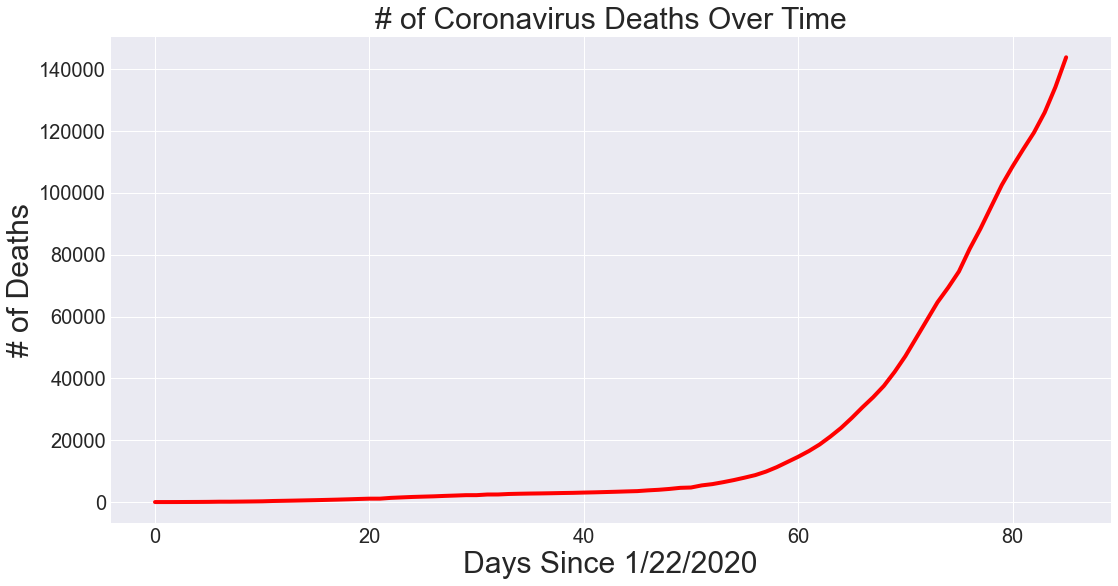

In [64]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Deaths', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

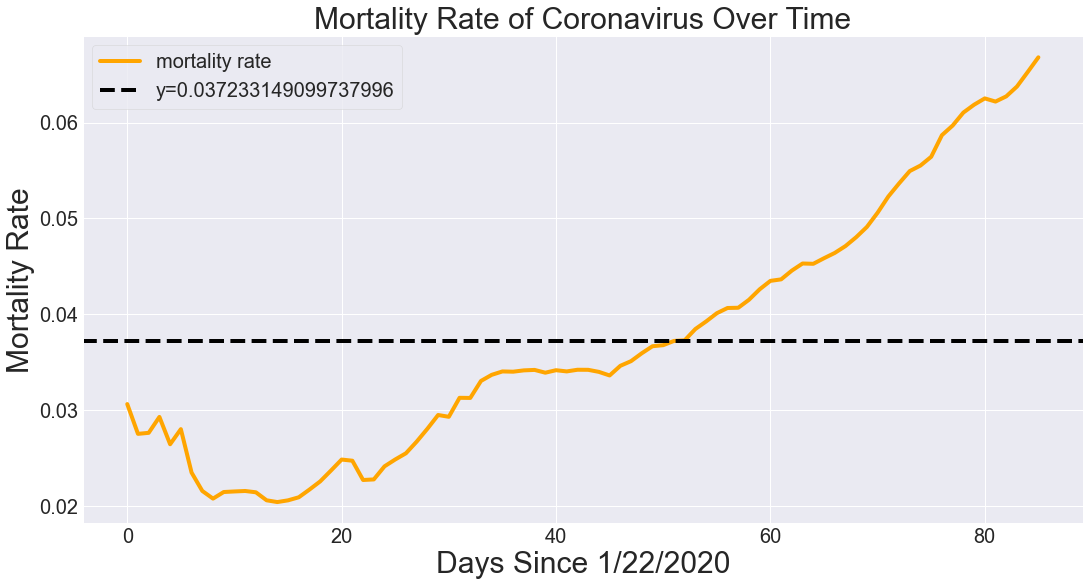

In [65]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

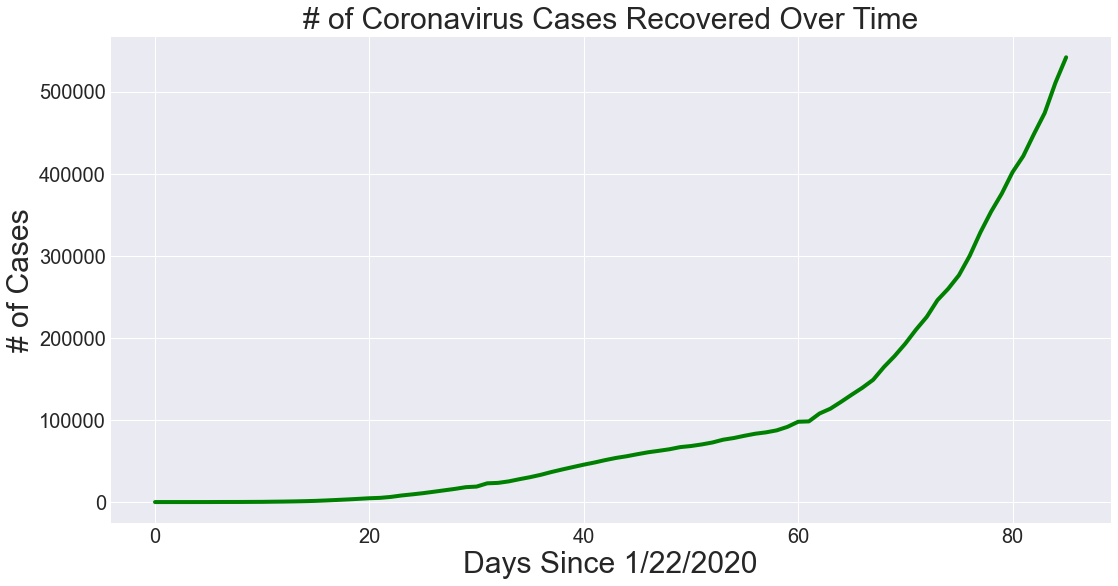

In [66]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('# of Coronavirus Cases Recovered Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

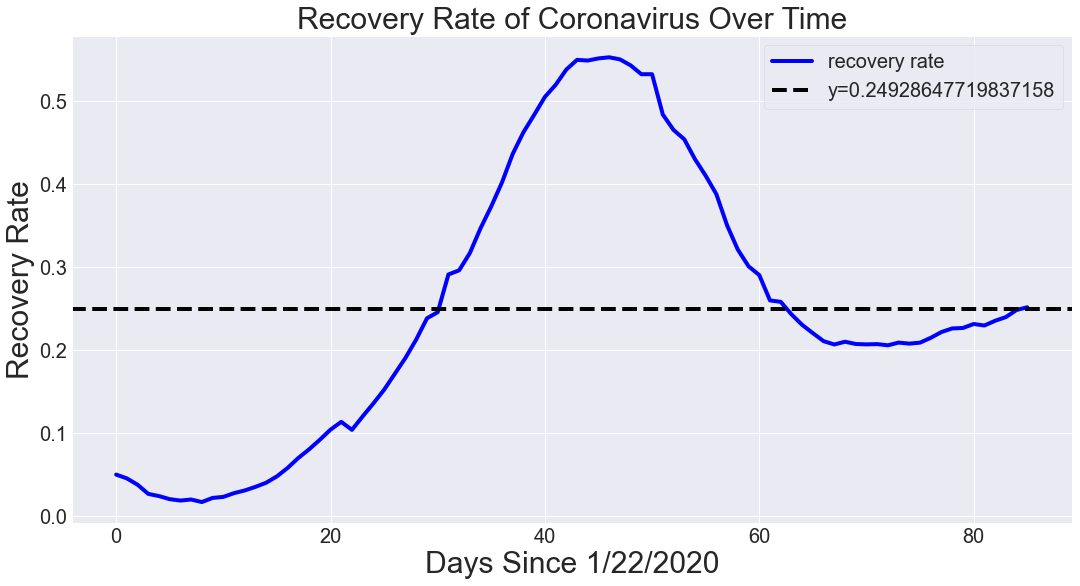

In [67]:
mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, recovery_rate, color='blue')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Recovery Rate of Coronavirus Over Time', size=30)
plt.legend(['recovery rate', 'y='+str(mean_recovery_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Recovery Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

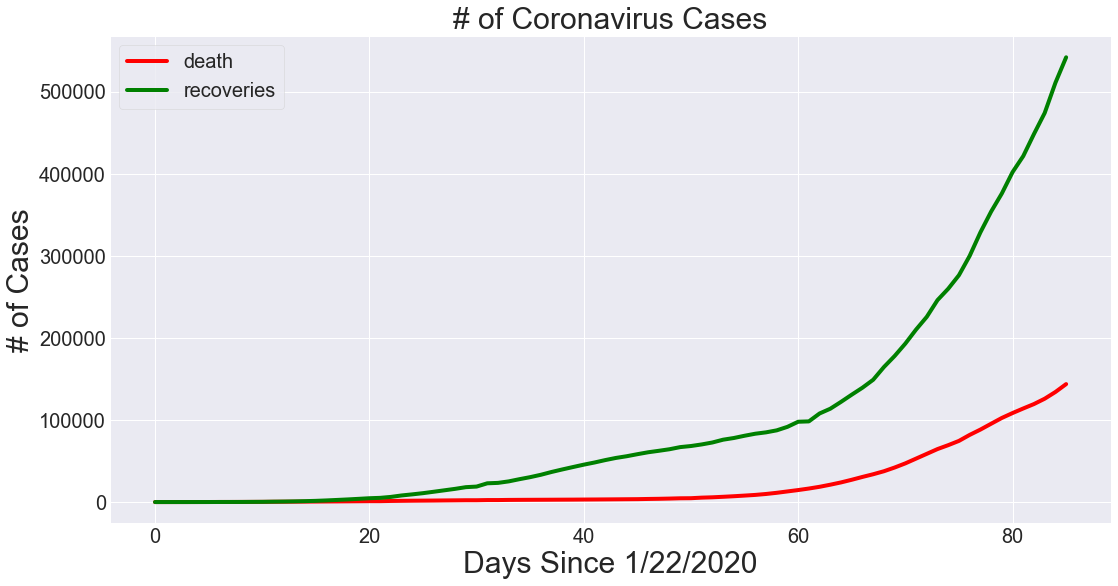

In [68]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()